# UFO Lat Long prediction using separate models in Python - Ganesh Ram

## Data and Package import, and Cleaning

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('scrubbed.csv', engine = 'python')

In [3]:
data.head()

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611


In [4]:
data.shape

(80332, 11)

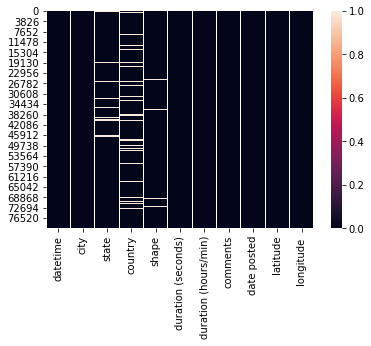

In [5]:
sns.heatmap(data.isnull())

In [6]:
data.drop(['duration (hours/min)','comments','state','country'],axis=1, inplace = True)

In [7]:
data['shape'].describe()

count     78400
unique       29
top       light
freq      16565
Name: shape, dtype: object

In [8]:
def impute_shape(col):
    
    if pd.isnull(col):
        return 'light'
    else:
        return col

In [9]:
data['shape'] = data['shape'].apply(impute_shape)

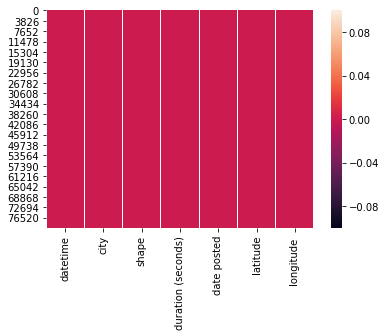

In [10]:
sns.heatmap(data.isnull())

In [11]:
data.drop(['date posted'],axis=1,inplace=True)

In [12]:
data.shape

(80332, 6)

In [13]:
data.columns

Index(['datetime', 'city', 'shape', 'duration (seconds)', 'latitude',
       'longitude '],
      dtype='object')

In [14]:
def get_date(col):
    return col.split(' ')[0]

def get_time(col):
    return col.split(' ')[1]

In [15]:
data['date'] = data['datetime'].apply(get_date)
data['time'] = data['datetime'].apply(get_time)

In [16]:
data.head()

,datetime,city,shape,duration (seconds),latitude,longitude,date,time
0,10/10/1949 20:30,san marcos,cylinder,2700,29.8830556,-97.941111,10/10/1949,20:30
1,10/10/1949 21:00,lackland afb,light,7200,29.38421,-98.581082,10/10/1949,21:00
2,10/10/1955 17:00,chester (uk/england),circle,20,53.2,-2.916667,10/10/1955,17:00
3,10/10/1956 21:00,edna,circle,20,28.9783333,-96.645833,10/10/1956,21:00
4,10/10/1960 20:00,kaneohe,light,900,21.4180556,-157.803611,10/10/1960,20:00


In [17]:
data.drop(['datetime'],axis=1,inplace=True)

In [18]:
data.head()

,city,shape,duration (seconds),latitude,longitude,date,time
0,san marcos,cylinder,2700,29.8830556,-97.941111,10/10/1949,20:30
1,lackland afb,light,7200,29.38421,-98.581082,10/10/1949,21:00
2,chester (uk/england),circle,20,53.2,-2.916667,10/10/1955,17:00
3,edna,circle,20,28.9783333,-96.645833,10/10/1956,21:00
4,kaneohe,light,900,21.4180556,-157.803611,10/10/1960,20:00


In [19]:
def get_month(col):
    return col.split('/')[0]

def get_day(col):
    return col.split('/')[1]

def get_year(col):
    return col.split('/')[2]

In [20]:
data['month'] = data['date'].apply(get_month)
data['day'] = data['date'].apply(get_day)
data['year'] = data['date'].apply(get_year)

In [21]:
data.head()

,city,shape,duration (seconds),latitude,longitude,date,time,month,day,year
0,san marcos,cylinder,2700,29.8830556,-97.941111,10/10/1949,20:30,10,10,1949
1,lackland afb,light,7200,29.38421,-98.581082,10/10/1949,21:00,10,10,1949
2,chester (uk/england),circle,20,53.2,-2.916667,10/10/1955,17:00,10,10,1955
3,edna,circle,20,28.9783333,-96.645833,10/10/1956,21:00,10,10,1956
4,kaneohe,light,900,21.4180556,-157.803611,10/10/1960,20:00,10,10,1960


In [22]:
data.drop(['date'],axis=1,inplace=True)

In [23]:
def get_hours(col):
    return col.split(':')[0]

def get_min(col):
    return col.split(':')[1]

In [24]:
data['hours'] = data['time'].apply(get_hours)
data['minutes'] = data['time'].apply(get_min)

In [25]:
data.head()

,city,shape,duration (seconds),latitude,longitude,time,month,day,year,hours,minutes
0,san marcos,cylinder,2700,29.8830556,-97.941111,20:30,10,10,1949,20,30
1,lackland afb,light,7200,29.38421,-98.581082,21:00,10,10,1949,21,00
2,chester (uk/england),circle,20,53.2,-2.916667,17:00,10,10,1955,17,00
3,edna,circle,20,28.9783333,-96.645833,21:00,10,10,1956,21,00
4,kaneohe,light,900,21.4180556,-157.803611,20:00,10,10,1960,20,00


In [26]:
data.drop(['time'],axis=1,inplace=True)

In [27]:
data.head()

,city,shape,duration (seconds),latitude,longitude,month,day,year,hours,minutes
0,san marcos,cylinder,2700,29.8830556,-97.941111,10,10,1949,20,30
1,lackland afb,light,7200,29.38421,-98.581082,10,10,1949,21,00
2,chester (uk/england),circle,20,53.2,-2.916667,10,10,1955,17,00
3,edna,circle,20,28.9783333,-96.645833,10,10,1956,21,00
4,kaneohe,light,900,21.4180556,-157.803611,10,10,1960,20,00


In [28]:
data.shape

(80332, 10)

In [29]:
data['city'].value_counts().index.value_counts().sum()

19900

In [30]:
len(data['shape'].value_counts().index)

29

In [31]:
len(data['city'].value_counts().index)

19900

In [32]:
shape_lst = list(data['shape'].value_counts().index)

In [33]:
shape_lst

['light',
 'triangle',
 'circle',
 'fireball',
 'other',
 'unknown',
 'sphere',
 'disk',
 'oval',
 'formation',
 'cigar',
 'changing',
 'flash',
 'rectangle',
 'cylinder',
 'diamond',
 'chevron',
 'egg',
 'teardrop',
 'cone',
 'cross',
 'delta',
 'crescent',
 'round',
 'dome',
 'pyramid',
 'changed',
 'hexagon',
 'flare']

In [34]:
def shape_dummy(col):
    return shape_lst.index(col)

In [35]:
data['shape'] = data['shape'].apply(shape_dummy)

In [36]:
data.head(50)

,city,shape,duration (seconds),latitude,longitude,month,day,year,hours,minutes
0,san marcos,14,2700,29.8830556,-97.941111,10,10,1949,20,30
1,lackland afb,0,7200,29.38421,-98.581082,10,10,1949,21,00
2,chester (uk/england),2,20,53.2,-2.916667,10,10,1955,17,00
3,edna,2,20,28.9783333,-96.645833,10,10,1956,21,00
4,kaneohe,0,900,21.4180556,-157.803611,10,10,1960,20,00
5,bristol,6,300,36.5950000,-82.188889,10,10,1961,19,00
6,penarth (uk/wales),2,180,51.434722,-3.180000,10,10,1965,21,00
7,norwalk,7,1200,41.1175000,-73.408333,10,10,1965,23,45
8,pell city,7,180,33.5861111,-86.286111,10,10,1966,20,00
9,live oak,7,120,30.2947222,-82.984167,10,10,1966,21,00


In [37]:
city_lst = list(data['city'].value_counts().index)

In [38]:
len(city_lst)

19900

In [39]:
def city_dummy(col):
    return city_lst.index(col)

In [40]:
data['city'] = data['city'].apply(city_dummy)

In [41]:
data.head(20)

,city,shape,duration (seconds),latitude,longitude,month,day,year,hours,minutes
0,308,14,2700,29.8830556,-97.941111,10,10,1949,20,30
1,13316,0,7200,29.38421,-98.581082,10,10,1949,21,00
2,4576,2,20,53.2,-2.916667,10,10,1955,17,00
3,4592,2,20,28.9783333,-96.645833,10,10,1956,21,00
4,1297,0,900,21.4180556,-157.803611,10,10,1960,20,00
5,118,6,300,36.5950000,-82.188889,10,10,1961,19,00
6,18392,2,180,51.434722,-3.180000,10,10,1965,21,00
7,189,7,1200,41.1175000,-73.408333,10,10,1965,23,45
8,3476,7,180,33.5861111,-86.286111,10,10,1966,20,00
9,1955,7,120,30.2947222,-82.984167,10,10,1966,21,00


In [42]:
data['latitude'].dtype

dtype('O')

In [43]:
data.columns = ['city', 'shape', 'duration (seconds)', 'latitude', 'longitude',
       'month', 'day', 'year', 'hours', 'minutes']

In [44]:
data['latitude'] = pd.to_numeric(data['latitude'],errors='coerce')

In [45]:
data['longitude'] = pd.to_numeric(data['longitude'],errors='coerce')

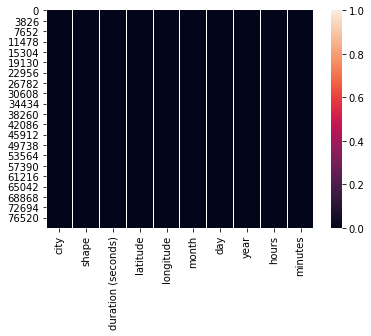

In [46]:
sns.heatmap(data.isnull())

In [47]:
data.dropna(inplace=True)

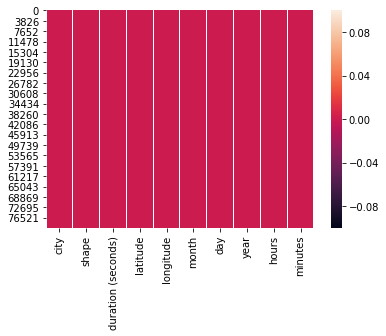

In [48]:
sns.heatmap(data.isnull())

In [61]:
def duration_string_clean(col):
    return col.replace('`','')

In [62]:
data['duration (seconds)'] = data['duration (seconds)'].apply(duration_string_clean)

In [63]:
data['duration (seconds)'] = data['duration (seconds)'].astype(float)

In [64]:
data.dtypes

city                    int64
shape                   int64
duration (seconds)    float64
latitude              float64
longitude             float64
month                  object
day                    object
year                   object
hours                  object
minutes                object
dtype: object

In [65]:
data.shape

(80331, 10)

## Train Test Split

### For two dependent variables, we create two splits each for latitude and longitude

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
data.head()

,city,shape,duration (seconds),latitude,longitude,month,day,year,hours,minutes
0,308,14,2700.0,29.883056,-97.941111,10,10,1949,20,30
1,13316,0,7200.0,29.384210,-98.581082,10,10,1949,21,00
2,4576,2,20.0,53.200000,-2.916667,10,10,1955,17,00
3,4592,2,20.0,28.978333,-96.645833,10,10,1956,21,00
4,1297,0,900.0,21.418056,-157.803611,10,10,1960,20,00


In [68]:
X = data.drop(['latitude','longitude'],axis=1)

In [69]:
y_lat = data['latitude']
y_long = data['longitude']

In [70]:
X_train,X_test,y_train_lat,y_test_lat = train_test_split(X,y_lat,test_size=0.3,random_state=100)

In [71]:
X_train,X_test,y_train_long,y_test_long = train_test_split(X,y_long,test_size=0.3,random_state=100)

In [72]:
X_train.shape

(56231, 8)

In [73]:
y_train_lat.shape,y_test_lat.shape,y_train_long.shape,y_test_long.shape

((56231,), (24100,), (56231,), (24100,))

# Machine Learning

## Linear Regression

In [93]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [76]:
lr_lat = LinearRegression()

In [77]:
lr_long = LinearRegression()

In [78]:
lr_lat.fit(X_train,y_train_lat)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [79]:
lr_long.fit(X_train,y_train_long)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [80]:
pred1_lat = lr_lat.predict(X_test)

In [82]:
pred1_long = lr_long.predict(X_test)

## Linear Regression Evaluation

In [84]:
print(mean_absolute_error(y_test_lat,pred1_lat))

6.133590581653456


In [85]:
print(mean_absolute_error(y_test_long,pred1_long))

23.0827787542819


In [86]:
print(mean_squared_error(y_test_lat,pred1_lat))

109.19508326367946


In [103]:
print(mean_squared_error(y_test_long,pred1_long))

1495.9725384896276


In [88]:
print(r2_score(y_test_lat,pred1_lat))

0.001383037888643468


In [104]:
print(r2_score(y_test_long,pred1_long))

0.045375393943912656


## Decision Tree Regression

In [94]:
from sklearn.tree import DecisionTreeRegressor

In [95]:
dtree_lat = DecisionTreeRegressor()

In [96]:
dtree_long = DecisionTreeRegressor()

In [97]:
dtree_lat.fit(X_train,y_train_lat)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [98]:
dtree_long.fit(X_train,y_train_long)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [99]:
pred2_lat = dtree_lat.predict(X_test)

In [100]:
pred2_long = dtree_long.predict(X_test)

## Decision Tree Evaluation

In [101]:
print(mean_absolute_error(y_test_lat,pred2_lat))

6.722156965585253


In [102]:
print(mean_absolute_error(y_test_lat,pred2_lat))

20.106796665203984


In [105]:
print(mean_squared_error(y_test_lat,pred2_lat))

182.4700967599151


In [107]:
print(mean_squared_error(y_test_long,pred2_long))

1973.9484509874956


In [108]:
print(r2_score(y_test_lat,pred2_lat))

-0.66873569996316


In [109]:
print(r2_score(y_test_long,pred2_long))

-0.25963526329265374


## Random Forest Regression

In [110]:
from sklearn.ensemble import RandomForestRegressor

In [111]:
rf_lat = RandomForestRegressor()

In [112]:
rf_long = RandomForestRegressor()

In [113]:
rf_lat.fit(X_train,y_train_lat)

C:\Users\LiveWire\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [114]:
rf_long.fit(X_train,y_train_long)

C:\Users\LiveWire\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [115]:
pred3_lat = rf_lat.predict(X_test)

In [116]:
pred3_long = rf_long.predict(X_test)

## Random Forest Evaluation

In [117]:
print(mean_absolute_error(y_test_lat,pred3_lat))

5.523093981539929


In [118]:
print(mean_absolute_error(y_test_long,pred3_long))

18.37358487523031


In [119]:
print(mean_squared_error(y_test_lat,pred3_lat))

99.04063033483192


In [120]:
print(mean_squared_error(y_test_long,pred3_long))

1146.9665328883855


In [121]:
print(r2_score(y_test_lat,pred3_lat))

0.09424810683338603


In [122]:
print(r2_score(y_test_long,pred3_long))

0.268086514660521


## AdaBoost Regression

In [127]:
from sklearn.ensemble import AdaBoostRegressor

In [129]:
ada_lat = AdaBoostRegressor()

In [130]:
ada_long = AdaBoostRegressor()

In [131]:
ada_lat.fit(X_train,y_train_lat)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=None)

In [132]:
ada_long.fit(X_train,y_train_long)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=None)

In [134]:
pred4_lat = ada_lat.predict(X_test)

In [135]:
pred4_long = ada_long.predict(X_test)

## AdaBoost Evaluation

In [136]:
print(mean_absolute_error(y_test_lat,pred4_lat))

15.76775293884014


In [137]:
print(mean_absolute_error(y_test_long,pred4_long))

30.496567595191927


In [138]:
print(mean_squared_error(y_test_lat,pred4_lat))

355.7808710038226


In [139]:
print(mean_squared_error(y_test_long,pred4_long))

1785.5286661127475


In [140]:
print(r2_score(y_test_lat,pred4_lat))

-2.2537070531026933


In [141]:
print(r2_score(y_test_long,pred4_long))

-0.1393989900447299


# End